In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
% matplotlib inline

In [3]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

c:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,

classification_report, confusion_matrix, mean_squared_error, r2_score

In [8]:
df_train = pd.read_csv('Train_Dataset_190649F.csv')
df_test = pd.read_csv('Test_Dataset_190649F.csv')

In [9]:
df_train.intertiol_plan.replace('no', 0, inplace=True)
df_train.intertiol_plan.replace('yes', 1, inplace=True)

df_test.intertiol_plan.replace('no', 0, inplace=True)
df_test.intertiol_plan.replace('yes', 1, inplace=True)

In [10]:
df_train.voice_mail_plan.replace('no', 0, inplace=True)
df_train.voice_mail_plan.replace('yes', 1, inplace=True)

df_test.voice_mail_plan.replace('no', 0, inplace=True)
df_test.voice_mail_plan.replace('yes', 1, inplace=True)

In [11]:
df_train.Churn.replace('No', 0, inplace=True)
df_train.Churn.replace('Yes', 1, inplace=True)

In [12]:
def one_hot_encoding(df, feature):
    data = df.copy()
    onehot = OneHotEncoder()
    onehot.fit(data[[feature]])

    encoded = onehot.transform(data[[feature]])
    data[onehot.categories_[0]] = encoded.toarray()
    return data.drop(feature, axis=1)

In [13]:
df_train = one_hot_encoding(df_train, 'location_code')
df_test = one_hot_encoding(df_test, 'location_code')

In [14]:
df_train['total_charge'] = df_train['total_intl_charge'] + df_train['total_night_charge'] + df_train[
    'total_eve_charge'] + df_train['total_day_charge']
df_test['total_charge'] = df_test['total_intl_charge'] + df_test['total_night_charge'] + df_test['total_eve_charge'] +
df_test['total_day_charge']

In [15]:
df_train['total_calls'] = df_train['total_intl_calls'] + df_train['total_night_calls'] + df_train['total_eve_calls'] +
df_train['total_day_calls']
df_test['total_calls'] = df_test['total_intl_calls'] + df_test['total_night_calls'] + df_test['total_eve_calls'] +
df_test['total_day_calls']

In [16]:
df_train['total_min'] = df_train['total_intl_minutes'] + df_train['total_night_minutes'] + df_train['total_eve_min'] +
df_train['total_day_min']
df_test['total_min'] = df_test['total_intl_minutes'] + df_test['total_night_minutes'] + df_test['total_eve_min'] +
df_test['total_day_min']

In [17]:
df_train["no_of_plans"] = df_train['intertiol_plan'] + df_train['voice_mail_plan']
df_test['no_of_plans'] = df_test['intertiol_plan'] + df_test['voice_mail_plan']

In [18]:
df_train['avg_call_mins'] = df_train['total_min'] / df_train['total_calls']
df_test['avg_call_mins'] = df_test['total_min'] / df_test['total_calls']

In [20]:
df_train.columns

Index([           'customer_id',         'account_length',
               'intertiol_plan',        'voice_mail_plan',
           'number_vm_messages',          'total_day_min',
              'total_day_calls',       'total_day_charge',
                'total_eve_min',        'total_eve_calls',
             'total_eve_charge',    'total_night_minutes',
            'total_night_calls',     'total_night_charge',
           'total_intl_minutes',       'total_intl_calls',
            'total_intl_charge', 'customer_service_calls',
                        'Churn',                    445.0,
                          452.0,                    547.0,
                 'total_charge',            'total_calls',
                    'total_min',            'no_of_plans',
                'avg_call_mins'],
      dtype='object')

In [25]:
x_columns = ['account_length',
             'intertiol_plan',
             'voice_mail_plan',
             'number_vm_messages',
             'total_day_min',
             'total_day_calls',
             'total_day_charge',
             'total_eve_min',
             'total_eve_calls',
             'total_eve_charge',
             'total_night_minutes',
             'total_night_calls',
             'total_night_charge',
             'total_intl_minutes',
             'total_intl_calls',
             'total_intl_charge',
             'customer_service_calls',
             445.0,
             452.0,
             547.0,
             'total_charge',
             'total_calls',
             'total_min',
             'no_of_plans',
             'avg_call_mins']

In [26]:
x =df_train[x_columns]
y=df_train['Churn']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
x_train.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,total_intl_charge,customer_service_calls,445.0,452.0,547.0,total_charge,total_calls,total_min,no_of_plans,avg_call_mins
1452,104.0,0,0,0.0,156.2,93.0,26.55,193.0,54.0,16.41,...,3.54,1.0,0.0,1.0,0.0,56.52,246.0,585.0,0,2.378049
2053,80.0,0,1,38.0,236.6,69.0,40.22,197.5,68.0,16.79,...,2.57,2.0,0.0,1.0,0.0,69.01,249.0,653.1,1,2.622892
1195,61.0,0,1,20.0,254.4,133.0,43.25,161.7,96.0,13.74,...,2.84,0.0,0.0,1.0,0.0,71.14,324.0,678.0,1,2.092593
1073,149.0,0,1,20.0,264.4,102.0,44.95,219.6,123.0,18.67,...,3.05,2.0,0.0,1.0,0.0,75.69,317.0,695.7,1,2.194637
1187,58.0,0,0,0.0,232.2,111.0,42.02,292.7,105.0,25.81,...,2.51,2.0,0.0,1.0,0.0,75.08,308.0,647.6,0,2.102597


In [28]:
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
# print('Cohen kappa score: ')
# print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.771551724137931
Classification report: 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       532
           1       0.86      0.04      0.07       164

    accuracy                           0.77       696
   macro avg       0.81      0.52      0.47       696
weighted avg       0.79      0.77      0.68       696

Confusion Matrix
[[531   1]
 [158   6]]


c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(x_train,y_train )
xg.score(x_train, y_train)


c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 
0.9683908045977011
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       532
           1       0.94      0.92      0.93       164

    accuracy                           0.97       696
   macro avg       0.96      0.95      0.96       696
weighted avg       0.97      0.97      0.97       696

Confusion Matrix
[[523   9]
 [ 13 151]]


c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
y_pred = xg.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))

Accuracy: 
0.9683908045977011
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       532
           1       0.94      0.92      0.93       164

    accuracy                           0.97       696
   macro avg       0.96      0.95      0.96       696
weighted avg       0.97      0.97      0.97       696

Confusion Matrix
[[523   9]
 [ 13 151]]


c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
%matplotlib inline

from sklearn.metrics import confusion_matrix

Text(6.800000000000008, 0.5, 'Truth')

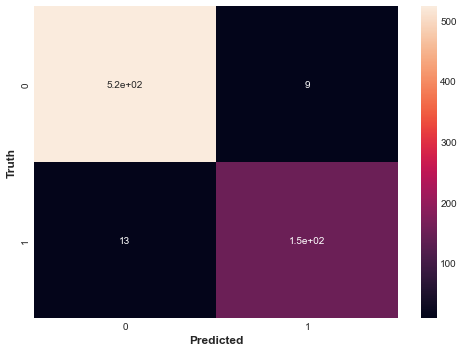

In [33]:


cm = confusion_matrix(y_test, y_pred)



plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
rf = RandomForestClassifier(random_state=1,n_estimators=400)
rf.fit(x_train,y_train )
rf.score(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))

c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 
0.9698275862068966
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       532
           1       0.98      0.89      0.93       164

    accuracy                           0.97       696
   macro avg       0.97      0.94      0.96       696
weighted avg       0.97      0.97      0.97       696

Confusion Matrix
[[529   3]
 [ 18 146]]


c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(6.800000000000008, 0.5, 'Truth')

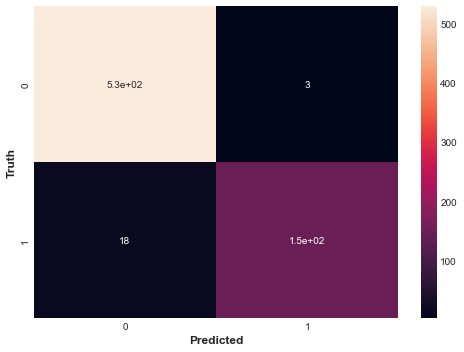

In [35]:
cm = confusion_matrix(y_test, y_pred)



plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
import xgboost

In [37]:
model_xg = XGBClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
model_xg.fit(x_train,y_train )
model_xg.score(x_train, y_train)

c:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9975323874151758

In [38]:
y_pred = model_xg.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))

Accuracy: 
0.9698275862068966
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       532
           1       0.98      0.89      0.93       164

    accuracy                           0.97       696
   macro avg       0.97      0.94      0.96       696
weighted avg       0.97      0.97      0.97       696

Confusion Matrix
[[529   3]
 [ 18 146]]


c:\python\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Text(6.800000000000008, 0.5, 'Truth')

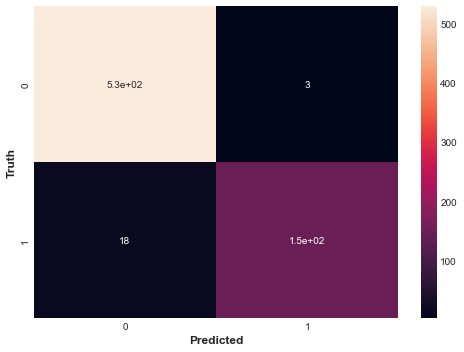

In [39]:
cm = confusion_matrix(y_test, y_pred)



plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=2,leaf_size=5,p=1)
knn.fit(x_train,y_train )
knn.score(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))

Accuracy: 
0.8160919540229885
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       532
           1       0.69      0.40      0.51       164

    accuracy                           0.82       696
   macro avg       0.76      0.67      0.70       696
weighted avg       0.80      0.82      0.80       696

Confusion Matrix
[[502  30]
 [ 98  66]]


c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
